In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

In [3]:
df = pd.read_csv('../002/auto-mpg.csv', header=None)

In [4]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [5]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [6]:
features = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [7]:
X=features[['weight']]  #독립 변수 X
y=features['mpg']       #종속 변수 Y

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

In [9]:
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


## 다항식 변환

#### 2차항 적용

In [10]:
poly = PolynomialFeatures(degree=2)

#### X_train 데이터를 2차항으로 변형

In [11]:
X_train_poly=poly.fit_transform(X_train)         

In [12]:
print('기존 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

기존 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [16]:
X_train

,weight
38,4209.0
172,2223.0
277,3410.0
196,2164.0
357,2615.0
...,...
375,1980.0
322,2110.0
15,2833.0
127,2901.0


In [17]:
X_train_poly

array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

### train data를 가지고 모델 학습

In [18]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.7087009262975685


#### train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 

In [20]:
y_hat_test = pr.predict(X_test_poly)

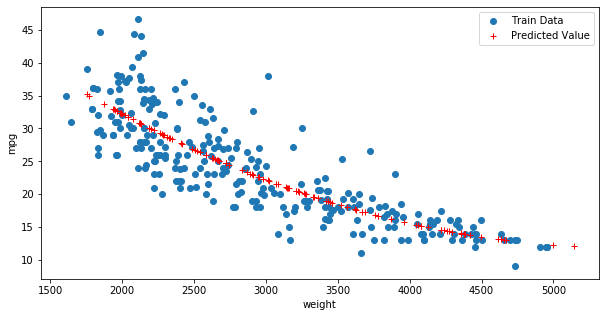

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

#### 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 

In [22]:
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

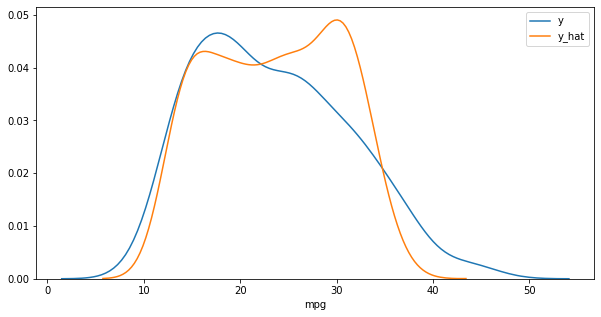

In [23]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()